# Multi-armed bandit

In this notebook we will learn some basic concepts of RL using the multi-armed bandit

## 1. Preparations

In [1]:
import numpy as np
from statistics import mean # This function performs the mean of a list
import matplotlib.pyplot as plt # This is for plotting
from environment import NArmedBandit # We load our environment here

## 2. Playing with environment

In [2]:
np.random.seed(0) # This line fixes the random seed, making everything reproducible
means = np.random.randn(10) # We draw 10 values from the standard normal distribution
print("Mean rewards:", means)

Mean rewards: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


We use this 10 values as the means of the rewards of each of the 10 arms of the 10-armed bandit

In [3]:
env = NArmedBandit(means)

Let us activate arm 0 many times and see what happens

In [4]:
action_to_explore = 0
for i in range(10):
    reward = env.step(action_to_explore)
    print("I activated arm {} and received reward {}".format(action_to_explore, reward))
    
print("If everything works, they should be normally distributed with mean", means[action_to_explore])

I activated arm 0 and received reward 1.908095917128542
I activated arm 0 and received reward 3.218325852930639
I activated arm 0 and received reward 2.5250900711146573
I activated arm 0 and received reward 1.8857273624604924
I activated arm 0 and received reward 2.2079155787130897
I activated arm 0 and received reward 2.097726673341931
I activated arm 0 and received reward 3.25813141912527
I activated arm 0 and received reward 1.558894082201863
I activated arm 0 and received reward 2.0771200476185654
I activated arm 0 and received reward 0.9099566066659392
If everything works, they should be normally distributed with mean 1.764052345967664


Now we define some useful functions to represent policies

## 3. Calculating averages

Calculate below the average reward of each arm. Maybe plot some histograms using plt.hist()

Average reward  1.7465363766548772
Average reward  0.378926072343155
Average reward  0.9838886591002729
Average reward  2.257367668951691
Average reward  1.871626184272503
Average reward  -0.9934917652906899
Average reward  0.9422339503745418
Average reward  -0.14773547948356586
Average reward  -0.08620628400481747
Average reward  0.38616165686227455


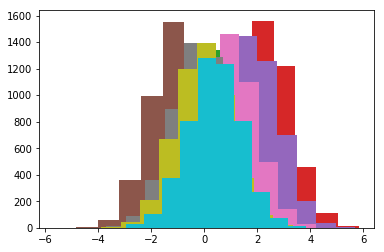

In [5]:
for action in range(env.num_arms):
    rewards = []
    for i in range(5000):
        r = env.step(action)
        rewards.append(r)
    print("Average reward ", mean(rewards))
    plt.hist(rewards)

## 4. Simple approximate ways of maximising expected cumulative reward

Some useful functions giving us policies

In [6]:
def greedy_policy(Q):
    """ Selects the arm whose empirical reward is the highest
    """
    return np.argmax(Q)

def random_policy(Q):
    """ Selects one arm at random
    """
    return np.random.choice(Q.shape[0])

def e_greedy_policy(Q, epsilon):
    """ With probability epsilon, it selects one arm at random
        With probability 1-epsilon, it selects the arm whose empirical reward is the highest
    """
    if np.random.rand() < epsilon:
        return random_policy(Q)
    else:
        return greedy_policy(Q)

In [26]:
def play_environment(env, epsilon, num_steps=500, optimistic_iv=0):

    num_times_visited = np.zeros(env.num_arms)
    average_reward = np.ones(env.num_arms)*optimistic_iv
    best_action = np.argmax(env._means)
    
    rewards = np.zeros(num_steps)
    best_actions = np.zeros(num_steps)
    step = 0

    # Exploration and exploitation

    for _ in range(num_steps):
        action = e_greedy_policy(average_reward, epsilon)
        best_actions[step] = (action == best_action)
        reward = env.step(action)
        num_times_visited[action] += 1
        average_reward[action] += (reward - average_reward[action])/num_times_visited[action]
        rewards[step] = reward
        step += 1

    return rewards, best_actions

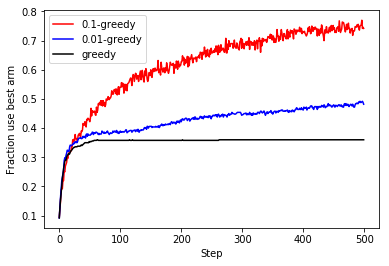

In [31]:
NUM_TRIALS = 500

envs = [NArmedBandit(np.random.randn(10)) for _ in range(NUM_TRIALS)]
epsilons = [0.1, 0.01, 0]
labels = ["0.1-greedy", "0.01-greedy", "greedy"]
colours = ["r", "b", "k"]

rewards_epsilon = []
fraction_best_action_epsilon = []
for epsilon in epsilons:
    list_rewards = []
    list_fraction_best_action = []
    for env in envs:
        rewards, fraction_best_action = play_environment(env, epsilon)
        list_rewards.append(rewards)
        list_fraction_best_action.append(fraction_best_action)
    rewards_epsilon.append(sum(list_rewards)/len(list_rewards))
    fraction_best_action_epsilon.append(sum(list_fraction_best_action)/len(list_fraction_best_action))

plt.figure(0)
for i in range(len(epsilons)):
    plt.plot(rewards_epsilon[i], colours[i], label=labels[i])
plt.xlabel("Step")
plt.ylabel("Average reward")
plt.legend()

plt.figure(1)
for i in range(len(epsilons)):
    plt.plot(fraction_best_action_epsilon[i], colours[i], label=labels[i])
plt.xlabel("Step")
plt.ylabel("Fraction use best arm")
plt.legend()

plt.show()
